In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
os.chdir(os.getenv("PROJECT_ROOT"))

# tsgm

## Load UCR bench 

In [10]:
from tsgm.utils.datasets import gen_sine_dataset

# List all available UCR datasets
ucr_datasets = UCRArchive18.list_datasets()
print("Available UCR datasets:", ucr_datasets)

NameError: name 'UCRArchive18' is not defined

In [16]:
from tsgm.utils.datasets import gen_sine_dataset
from patrec.utils.visuals import plot_series

dt = gen_sine_dataset(10, 100, 1, 80)

dt.shape

(10, 100, 1)

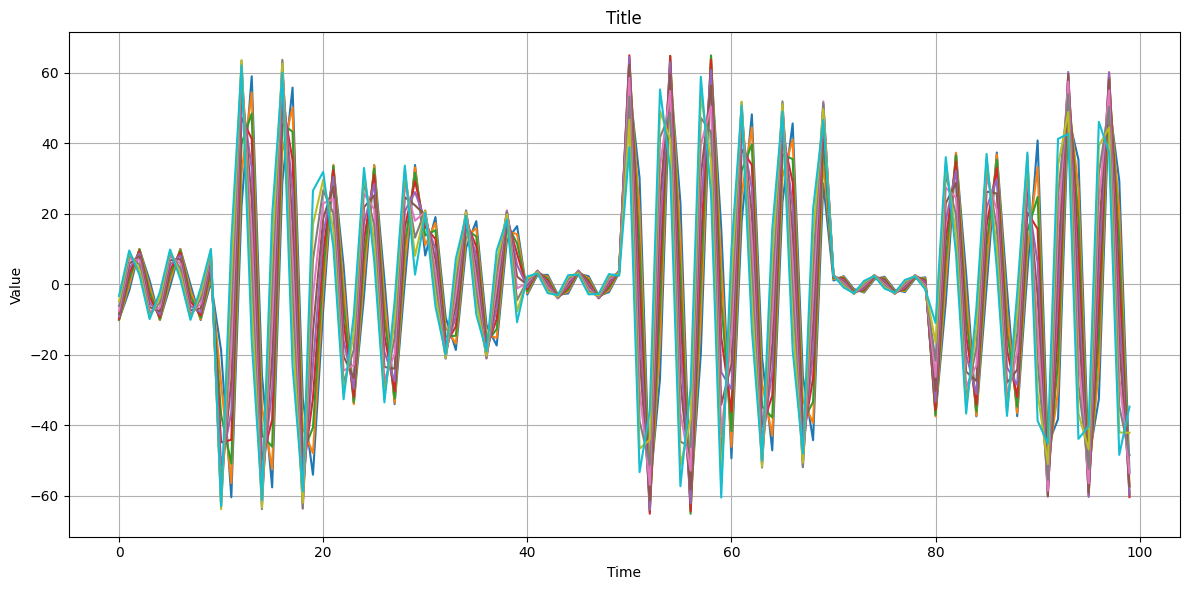

In [19]:
plot_series(dt.squeeze(2).reshape(-1,10), show_legend=False)

In [21]:
import tsgm 
import keras 


n, n_ts, n_features  = 1000, 24, 5
data = tsgm.utils.gen_sine_dataset(n, n_ts, n_features)
scaler = tsgm.utils.TSFeatureWiseScaler()
scaled_data = scaler.fit_transform(data)
architecture = tsgm.models.zoo["vae_conv5"](n_ts, n_features, 10)
encoder, decoder = architecture.encoder, architecture.decoder
vae = tsgm.models.cvae.BetaVAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

vae.fit(scaled_data, epochs=1, batch_size=64)
vae.generate(10)

16/16 [==============================] - 2s 39ms/step - loss: 307.1141 - reconstruction_loss: 310.8369 - kl_loss: 0.3178


<tf.Tensor: shape=(10, 24, 5), dtype=float32, numpy=
array([[[0.50441206, 0.48296863, 0.48858997, 0.48537812, 0.4947427 ],
        [0.49297595, 0.48190936, 0.47082177, 0.4613367 , 0.47328892],
        [0.47782743, 0.4681382 , 0.46255925, 0.44493335, 0.46539786],
        ...,
        [0.5111499 , 0.5588087 , 0.56519276, 0.5559114 , 0.48171392],
        [0.5107125 , 0.5525499 , 0.56527823, 0.530491  , 0.4756617 ],
        [0.49828658, 0.53788525, 0.54188126, 0.5134058 , 0.47395828]],

       [[0.4983879 , 0.49216226, 0.49530363, 0.4961927 , 0.4969085 ],
        [0.49369124, 0.4919486 , 0.48968542, 0.48840865, 0.48894018],
        [0.49007   , 0.4873967 , 0.48642024, 0.48182437, 0.48591456],
        ...,
        [0.5003137 , 0.52067035, 0.52582824, 0.52161056, 0.49458498],
        [0.50020206, 0.52014816, 0.526901  , 0.5128702 , 0.49050695],
        [0.49586585, 0.5150849 , 0.5180882 , 0.5055812 , 0.48915997]],

       [[0.5029592 , 0.4847266 , 0.48984152, 0.4882195 , 0.49535745],
       

In [24]:
ucr_data_manager = tsgm.utils.UCRDataManager(ds="gunpoint")
X_train, y_train, X_test, y_test = ucr_data_manager.get()

INFO:utils:### Downloading from https://www.cs.ucr.edu/~eamonn/time_series_data_2018/UCRArchive_2018.zip ###
INFO:utils:Attempt 1 / 3


KeyboardInterrupt: 

In [4]:
import numpy as np
import pandas as pd
import tsgm
from tsgm.models import gan, vae
from tsgm.utils import tsne_plot
import matplotlib.pyplot as plt

# Load dataset
dataset_name = "ds001_univariate_sin"
dataset_generator = getattr(tsgm.dataset, dataset_name)
X_train, y_train, X_test, y_test, meta = dataset_generator(n_samples=500)

seq_len, feat_dim = X_train.shape[1], X_train.shape[2]

# Show sample
print("Sample of Original Time Series:")
df_sample = pd.DataFrame(X_train[0].reshape(-1, feat_dim))
print(df_sample.head())

# Train GAN
gan_model = gan.WGANGP(seq_len=seq_len, feat_dim=feat_dim)
gan_model.train(X_train, epochs=50, batch_size=64)
synthetic_X_gan = gan_model.generate(10)

print("\nGenerated Synthetic Data (GAN):")
df_syn_gan = pd.DataFrame(synthetic_X_gan[0].reshape(-1, feat_dim))
print(df_syn_gan.head())

# Optional: t-SNE plot
tsne_plot(X_real=X_train.reshape(X_train.shape[0], -1),
          X_fake=synthetic_X_gan.reshape(synthetic_X_gan.shape[0], -1),
          title="GAN Generated vs Real",
          save_path="gan_tsne.png")

ImportError: cannot import name 'gan' from 'tsgm.models' (/home/ilia_linux/patrec_time_series/.basic_venv_310/lib/python3.10/site-packages/tsgm/models/__init__.py)

# Dataset format

In [2]:
import numpy as np
from patrec.utils.files_helper import Format1_loader

X_test=np.load('data/sub_UCR_bench/MelbournePedestrian/sample_2/X_test.npy')
X_test.shape

(20, 1, 24)

In [3]:
loader = Format1_loader(npy_files={
    'data': 'data/sub_UCR_bench/MelbournePedestrian/sample_2/X_test.npy',
    'labels': 'data/sub_UCR_bench/MelbournePedestrian/sample_2/y_test.npy', 
    'meta': None 
})

In [9]:
loader.to_json('.temp/test/file.json')

# ML Flow

In [14]:
from patrec.utils.mlflow_exp import MLflow_Experiment_Logger

# Initialize logger with experiment name and optional tags
logger = MLflow_Experiment_Logger(
    experiment_name="test_experiment",
    tags={
        "project": "test",
        "team": "i1",
        "version": "1.0"
    },
    run_name="xgboost_baseline"
)

# From a dictionary
params = {
    "learning_rate": 0.1,
    "max_depth": 6,
    "n_estimators": 100,
    "preprocessing": {
        "scaling": "standard",
        "imputation": "median"
    }
}
logger.log_parameters(params)

# From a YAML config file
# logger.log_parameters("configs/model_params.yaml")

# Simple metrics
metrics = {
    "mean_accuracy": 0.92,
    "mean_precision": 0.88,
    "mean_recall": 0.85,
    "mean_f1": 0.86
}
logger.log_metrics(metrics)

# full metrics
metrics = {
    "mean_accuracy": [0.91 for _ in range(5)],
    "mean_precision": [0.88 for _ in range(5)],
    "mean_recall": [0.85 for _ in range(5)],
    "mean_f1": [0.86 for _ in range(5)]
}
logger.log_metrics(metrics)

# Time-series metrics (like training history)
training_history = {
    "loss": [0.5, 0.3, 0.2, 0.15, 0.12],  # Will be logged with steps
    "val_loss": [0.6, 0.4, 0.3, 0.25, 0.22]
}
logger.log_metrics(training_history)


# Log plots from a directory
logger.log_plots("data/Synthetic_data/test_mlflow/pics")

# Log dataset information
# logger.log_dataset("data/Synthetic_data/test_mlflow/sample1_10_1_0.json")
logger.log_dataset(".temp/test/file.json")

# Log estimator parameters separately
# logger.log_estimator_params("models/xgboost_params.json")
logger.log_estimator_params(params)

# from sklearn.ensemble import RandomForestClassifier

# Train a model
# model = RandomForestClassifier(n_estimators=100)
# model.fit(X_train, y_train)

# Log the trained model
# logger.log_model(model, model_format="pickle")

In [15]:
logger._end_run()

🏃 View run xgboost_baseline at: http://localhost:5000/#/experiments/811532455307211769/runs/b7e2486d9e374f7ca11ef88e86f42cb9
🧪 View experiment at: http://localhost:5000/#/experiments/811532455307211769
